In [ ]:
from datetime import datetime
from huggingface_hub import list_models
# Viz imports
import pandas as pd
#
import matplotlib.pyplot as plt
import seaborn as sns
#
import warnings # suppress some known user warnings


# OSS LLM inventory analysis

*Huggingface* happens to be one of the most popular model store for all AI/AGI models. This experiment tries to explore the rate at which the LLMs are released to production based on data registered at huggingface. It also tries to currate the following factors:

1. Area of operation

2. Popularity



In [ ]:
llm_models = list(
    list_models(
        filter = 'llm',
        sort='downloads', direction = -1
    )
)
print(f"Total number of models: {len(llm_models)}")

**Extracting relevant data**

In [ ]:
llm_models_df = pd.DataFrame(list(
    map(
        lambda m: {'Name': m.id,
                   'Created': m.created_at,
                   'Downloads': m.downloads
                   }, llm_models
    ))
)

In [ ]:
llm_models_df.head()

**Plotting the trend chart**

In [ ]:
llm_models_df['Week'] = llm_models_df['Created'].dt.to_period('w').astype(str)
d = llm_models_df.groupby('Week')['Name'].count().reset_index()
d.columns = ['Week', 'Count']
d['MovingAvg'] =d['Count'].rolling(window=3, min_periods=1).mean()

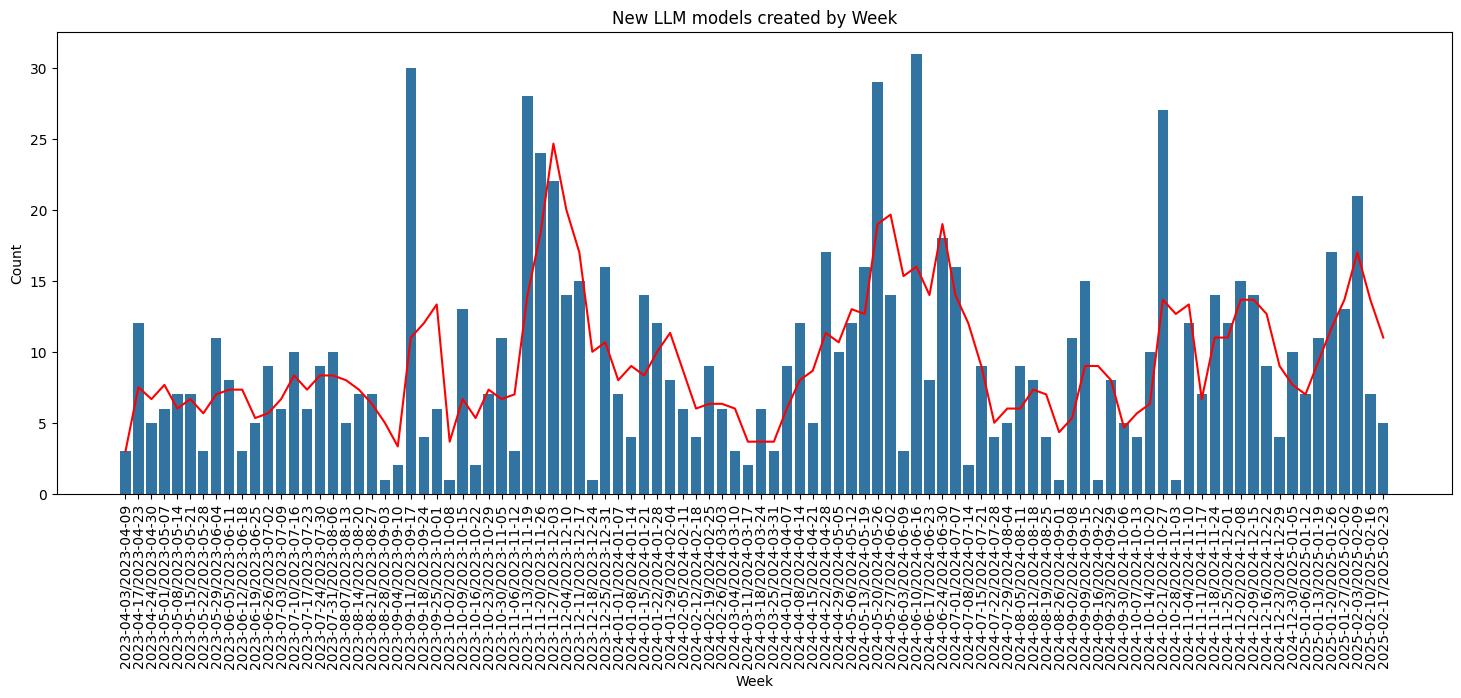

In [80]:


plt.figure(figsize=(18, 6))
sns.barplot(x = 'Week', y ='Count', data = d)
sns.lineplot(x = 'Week', y = 'MovingAvg', data =d, color = 'red')
plt.xticks(rotation=90)
plt.title("New LLM models registered by Week")
plt.show()
